## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline
import scipy.stats as stats
from datetime import datetime as dt

## Importing Dataset

In [2]:
credit = pd.read_csv('C:/Users/HP/Downloads/4. Segmentation of Credit Card Customers/CC_GENERAL.csv')

In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [4]:
credit.isna().sum() #We have missing values in two columns

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
credit.shape

(8950, 18)

In [6]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Treating missing Values

In [7]:
credit['CREDIT_LIMIT'].fillna(credit['CREDIT_LIMIT'].median(),inplace=True)

In [8]:
credit['MINIMUM_PAYMENTS'].fillna(credit['MINIMUM_PAYMENTS'].median(),inplace=True)

In [9]:
credit.isna().sum() #Now we do not have

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Making new KPIs

In [10]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']

In [11]:
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']

In [12]:
credit[credit['ONEOFF_PURCHASES']==0].ONEOFF_PURCHASES.count()

4302

In [13]:
credit['limit_usage']=credit['BALANCE']/credit['CREDIT_LIMIT']

In [14]:
credit['limit_usage'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: limit_usage, dtype: float64

In [15]:
def purchase(credit):
    if (credit['ONEOFF_PURCHASES'] == 0) & (credit['INSTALLMENTS_PURCHASES'] == 0):
        return 'none'
    if (credit['ONEOFF_PURCHASES'] > 0) & (credit['INSTALLMENTS_PURCHASES'] > 0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES'] > 0) & (credit['INSTALLMENTS_PURCHASES'] == 0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES'] ==0) & (credit['INSTALLMENTS_PURCHASES'] > 0):
        return 'installment'

In [16]:
credit['purchase_type'] = credit.apply(purchase , axis=1)

In [17]:
credit.shape

(8950, 22)

In [18]:
credit['purchase_type'].value_counts()

both_oneoff_installment    2774
installment                2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

In [19]:
credit.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'purchase_type'],
      dtype='object')

In [20]:
credit['MINIMUM_PAYMENTS'].isnull().value_counts()

False    8950
Name: MINIMUM_PAYMENTS, dtype: int64

In [21]:
credit['payment_minpay'] = credit.apply(lambda x:x['PAYMENTS'] / x['MINIMUM_PAYMENTS'] , axis = 1)

In [22]:
credit['payment_minpay']

0        1.446508
1        3.826241
2        0.991682
3        0.000000
4        2.771075
5        0.581601
6       32.081820
7        1.276357
8        2.206280
9       11.612605
10       0.498597
11       4.536309
12       1.240830
13       6.593552
14       0.813816
15       0.944800
16       1.040881
17       3.477861
18       2.311048
19       0.084551
20       0.016454
21       1.251952
22      27.332818
23       6.649970
24       0.858615
25       1.320852
26       0.916592
27       1.261155
28       0.971251
29       1.006784
          ...    
8920     0.234940
8921     3.304997
8922     0.659354
8923     1.985987
8924     4.856447
8925     5.191574
8926    12.226247
8927     2.678503
8928     6.184871
8929     0.000000
8930     1.385733
8931     2.112821
8932     1.596541
8933     0.314676
8934     2.448965
8935     0.000000
8936     6.972789
8937     1.936734
8938    64.055621
8939     0.653714
8940     5.745025
8941     1.120950
8942     1.095102
8943     1.348973
8944     0

## separating categorical & numerical columns

In [23]:
numeric_var_names=[key for key in dict(credit.dtypes) if dict(credit.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(credit.dtypes) if dict(credit.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage', 'payment_minpay']
['CUST_ID', 'purchase_type']


In [24]:
credit_n = credit[numeric_var_names]

In [25]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), 
                      x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), 
                      x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary = credit_n.apply(var_summary)

In [26]:
num_summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpay
N,8.950000e+03,8950.000000,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8.950000e+03,8.950000e+03,8.950000e+03,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
NMISS,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SUM,1.400205e+07,7851.572994,8.978683e+06,5.302314e+06,3.679055e+06,8.760896e+06,4388.637408,1811.996268,3261.714207,1209.540593,...,131653.000000,4.022383e+07,1.551164e+07,7.561916e+06,1375.746104,103080.000000,771267.797313,796352.953935,3480.508567,81079.518764
MEAN,1.564475e+03,0.877271,1.003205e+03,5.924374e+02,4.110676e+02,9.788711e+02,0.490351,0.202458,0.364437,0.135144,...,14.709832,4.494282e+03,1.733144e+03,8.449068e+02,0.153715,11.517318,86.175173,88.977984,0.388884,9.059164
MEDIAN,8.733852e+02,1.000000,3.612800e+02,3.800000e+01,8.900000e+01,0.000000e+00,0.500000,0.083333,0.166667,0.000000,...,7.000000,3.000000e+03,8.569015e+02,3.123439e+02,0.000000,12.000000,31.936667,0.000000,0.302720,2.032717
STD,2.081532e+03,0.236904,2.136635e+03,1.659888e+03,9.043381e+02,2.097164e+03,0.401371,0.298336,0.397448,0.200121,...,24.857649,3.638647e+03,2.895064e+03,2.332792e+03,0.292499,1.338331,180.508787,193.136115,0.389722,118.180526
VAR,4.332775e+06,0.056124,4.565208e+06,2.755228e+06,8.178274e+05,4.398096e+06,0.161098,0.089004,0.157965,0.040049,...,617.902719,1.323975e+07,8.381394e+06,5.441920e+06,0.085556,1.791129,32583.422024,37301.558819,0.151883,13966.636633
MIN,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000e+01,0.000000e+00,1.916300e-02,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
P1,6.510059e-02,0.090909,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000e+02,0.000000e+00,2.004061e+01,0.000000,6.000000,0.000000,0.000000,0.000029,0.000000
P5,8.814518e+00,0.272727,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000e+03,8.998892e+01,7.464412e+01,0.000000,8.000000,0.000000,0.000000,0.002943,0.277366


## Treating Outliers

In [27]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

credit_n = credit_n.apply(lambda x: outlier_capping(x))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
x=credit.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpay']))
type(x)
x.values

array([ 7.23698216, 13.2590037 , 10.08745106,  5.57108156])

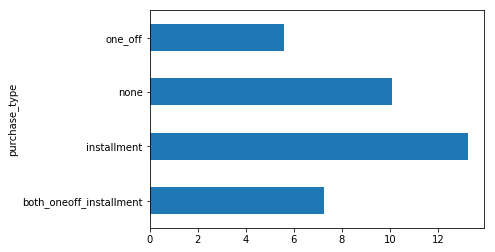

In [29]:
x.plot.barh()

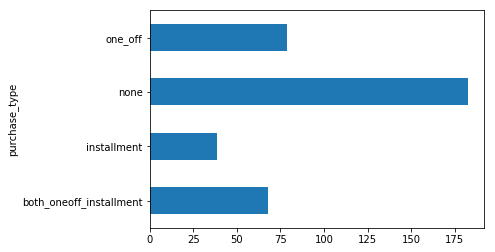

In [30]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

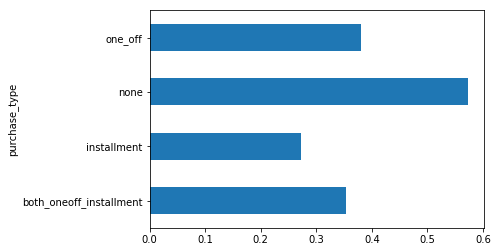

In [31]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.barh()

In [32]:
credit_n['purchase_type'] = credit['purchase_type']

In [33]:
credit_n.shape

(8950, 22)

## Making dummies for 1 categorical column

In [34]:
dummy = pd.get_dummies(credit_n['purchase_type'])

In [35]:
creditnew = pd.concat([credit_n , dummy] , axis=1) #concating and makung new and final dataset

In [36]:
creditnew.drop(columns = 'purchase_type' ,inplace = True) #dropping as we do not need it

In [37]:
creditnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 25 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null float64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT         

## Standardising the dataset

In [38]:
from sklearn.preprocessing import  StandardScaler

In [39]:
sc=StandardScaler()

In [40]:
credit_scaled = sc.fit_transform(creditnew)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Applying PCA

## With the help of PCA we will reduce features

In [41]:
from sklearn.decomposition import PCA

In [42]:
creditnew.shape

(8950, 25)

In [43]:
pc=PCA(n_components=25)
cr_pca=pc.fit(credit_scaled)

In [44]:
pc.explained_variance_

array([6.71589744e+00, 4.91151015e+00, 2.35827844e+00, 2.03320375e+00,
       1.28840989e+00, 1.25321187e+00, 1.04294019e+00, 8.90125297e-01,
       7.64941924e-01, 6.23996324e-01, 5.64560871e-01, 5.03069314e-01,
       4.34446648e-01, 3.69110404e-01, 3.15399656e-01, 2.52427727e-01,
       2.06153465e-01, 1.79210651e-01, 1.25449913e-01, 1.03372400e-01,
       3.45206095e-02, 1.86459738e-02, 1.03153594e-02, 3.59535252e-03,
       9.62276113e-32])

In [45]:
sum(pc.explained_variance_)

25.002793608224366

In [46]:
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
var1

array([26.86, 46.5 , 55.93, 64.06, 69.21, 74.22, 78.39, 81.95, 85.01,
       87.51, 89.77, 91.78, 93.52, 95.  , 96.26, 97.27, 98.09, 98.81,
       99.31, 99.72, 99.86, 99.93, 99.97, 99.98, 99.98])

In [47]:
pd.DataFrame({'Eigen_value': pc.explained_variance_, 'Cumm_variance':var1}, index=range(1,26))

,Eigen_value,Cumm_variance
1,6.715897e+00,26.86
2,4.911510e+00,46.50
3,2.358278e+00,55.93
4,2.033204e+00,64.06
5,1.288410e+00,69.21
6,1.253212e+00,74.22
7,1.042940e+00,78.39
8,8.901253e-01,81.95
9,7.649419e-01,85.01
10,6.239963e-01,87.51


In [48]:
pc_final=PCA(n_components=6).fit(credit_scaled)

In [49]:
pc_final.explained_variance_

array([6.71589744, 4.91151015, 2.35827844, 2.03320374, 1.28840257,
       1.25321175])

In [50]:
reduced_cr=pc_final.fit_transform(credit_scaled)

In [51]:
dim = pd.DataFrame(reduced_cr)

In [52]:
dim.shape

(8950, 6)

In [53]:
dim.columns = ["C1", "C2", "C3", "C4", "C5", "C6" ]

In [54]:
from sklearn.cluster import KMeans

In [55]:
km_4=KMeans(n_clusters=4,random_state=123)

In [56]:
km_4.fit(reduced_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [57]:
pd.Series(km_4.labels_).value_counts()

2    3343
0    3250
3    1204
1    1153
dtype: int64

In [58]:
cluster_range = range( 1, 26 )
cluster_errors = []

for x in cluster_range:
    clusters = KMeans( x )
    clusters.fit( reduced_cr )
    cluster_errors.append( clusters.inertia_ )

In [59]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:26]

,num_clusters,cluster_errors
0,1,166098.012919
1,2,127752.164590
2,3,100029.080904
3,4,84924.818388
4,5,73429.155979
5,6,63195.071466
6,7,59039.253258
7,8,54976.774900
8,9,51989.094735
9,10,49258.888681


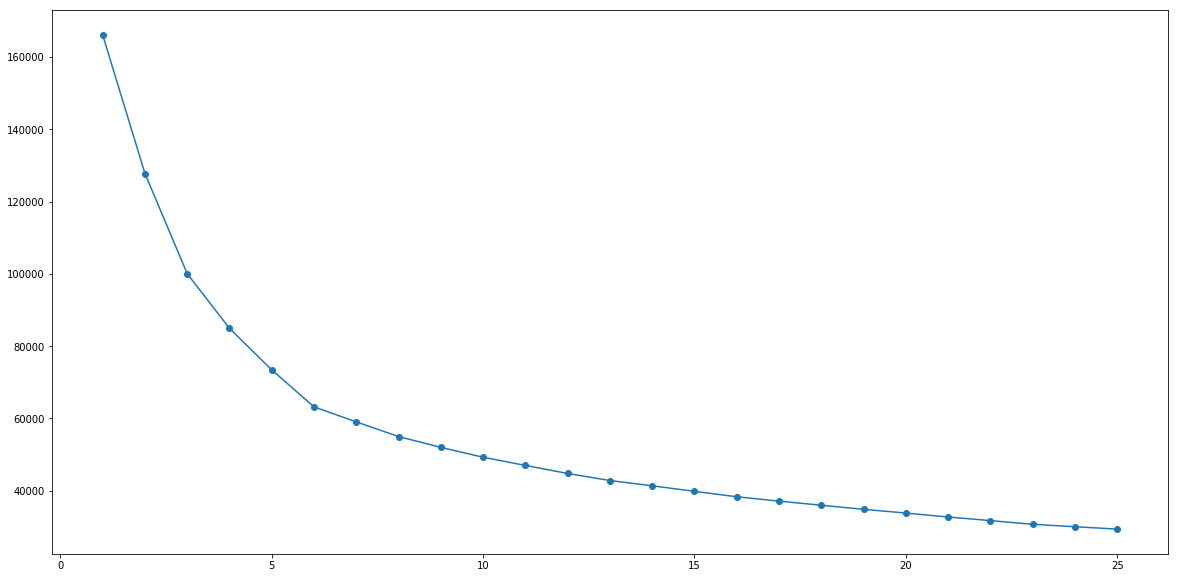

In [60]:
#Elbow Analysis

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [61]:
from sklearn import metrics

In [62]:
# calculating SC
k_range = range(2, 25)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

In [63]:
scores

[0.3002984215571806,
 0.26187193052118796,
 0.2486241629764369,
 0.2941196882929565,
 0.31377860713851563,
 0.2958893209928443,
 0.30888848208373126,
 0.29707235057629117,
 0.28584996975227783,
 0.3007562274834193,
 0.2831909569577549,
 0.28353529250046033,
 0.2851407992961537,
 0.27290830513779624,
 0.2825891163732427,
 0.26601463757938815,
 0.2626951628695425,
 0.26814719299923734,
 0.2633086541361314,
 0.2607802770538322,
 0.25629307795815753,
 0.2615545903073922,
 0.26053858671233665]

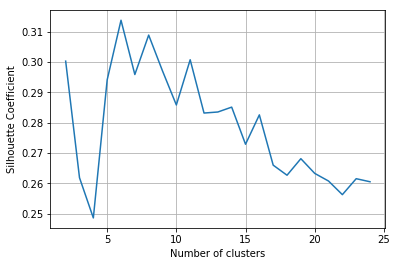

In [64]:
# plotting the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

From elbow analysis & silhouette cofficient clusters 4,5,6 seem appropriate

## Key performace variable selection , taking varibales which we will use in derving new KPI.

In [66]:
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','installment','one_off','none','CREDIT_LIMIT']

In [67]:
creditnew.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_minpay', 'both_oneoff_installment', 'installment', 'none',
       'one_off'],
      dtype='object')

In [68]:
# Conactenating labels found through Kmeans with data 

c4 = pd.concat([creditnew[col_kpi] , pd.Series(km_4.labels_,name='Cluster_4')] , axis = 1)

In [69]:
c4.head(4)

,PURCHASES_TRX,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpay,both_oneoff_installment,installment,one_off,none,CREDIT_LIMIT,Cluster_4
0,2.0,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,0
1,0.0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,1
2,12.0,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,2
3,1.0,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,2


In [70]:
cluster_4 = c4.groupby('Cluster_4').apply(lambda x: x[col_kpi].mean())
cluster_4.T

Cluster_4,0,1,2,3
PURCHASES_TRX,14.271849,6.565924,3.195785,51.509444
Monthly_avg_purchase,58.196907,38.295236,26.539309,331.364817
Monthly_cash_advance,14.961777,407.241078,58.200525,39.289646
limit_usage,0.254144,0.620480,0.462327,0.305319
CASH_ADVANCE_TRX,0.641846,13.114484,2.525875,1.585548
payment_minpay,4.419245,4.067849,4.193721,11.490448
both_oneoff_installment,0.357538,0.215091,0.081065,0.907807
installment,0.637231,0.101474,0.016452,0.014120
one_off,0.005231,0.195143,0.460066,0.078073
none,0.000000,0.488291,0.442417,0.000000


In [72]:
s=c4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())

p = pd.Series((s.values.astype('float')/ c4.shape[0])*100 , name='Percentage')

print ("Cluster_4"),'\n'
print (pd.concat([pd.Series(s.values,name='Size') , p],axis=1))

Cluster_4
   Size  Percentage
0  3250   36.312849
1  1153   12.882682
2  3343   37.351955
3  1204   13.452514


Cluster 0 has about 37% of the total customer base, which is second highest 
and also it has second highest Monthly Average Purchase

Cluster 1 has about 12% of the total customer base, which is lowest but it has highest Monthly Cash Advance

Cluster 2 has the highest customr base i.e. 38% (approx) it also has second highest Monthly Cash Advance

Cluster 3 has about 13% of the total customer base, which is second lowest. It also has the highest Monthly Avergae Purchase

## Now finding customer characterstics with 5 clusters 

In [87]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_cr)
km_5.labels_

array([4, 2, 1, ..., 4, 0, 1])

In [88]:
pd.Series(km_5.labels_).value_counts()

4    3530
0    1808
1    1642
3    1106
2     864
dtype: int64

In [89]:
c5 = pd.concat([creditnew[col_kpi],pd.Series(km_5.labels_,name='Cluster_5')],axis=1)

In [92]:
Cluster_5 = c5.groupby('Cluster_5').apply(lambda x: x[col_kpi].mean())

In [93]:
Cluster_5.T

Cluster_5,0,1,2,3,4
PURCHASES_TRX,0.268805,6.006401,8.373275,53.658562,14.086547
Monthly_avg_purchase,1.375922,54.105248,48.186803,343.734175,58.880064
Monthly_cash_advance,110.299731,34.483955,464.168757,39.424648,16.814106
limit_usage,0.566182,0.354358,0.622098,0.308166,0.274987
CASH_ADVANCE_TRX,4.584071,1.511571,14.363426,1.581374,0.745326
payment_minpay,3.972847,4.730806,4.273249,11.765975,4.320323
both_oneoff_installment,0.033739,0.017052,0.273148,0.928571,0.402833
installment,0.017146,0.000000,0.121528,0.014467,0.597167
one_off,0.003319,0.982948,0.221065,0.056962,0.000000
none,0.945796,0.000000,0.384259,0.000000,0.000000


In [95]:
s=c5.groupby('Cluster_5').apply(lambda x: x['Cluster_5'].value_counts())

p = pd.Series((s.values.astype('float')/ c5.shape[0])*100 , name='Percentage')

print ("Cluster_5"),'\n'
print (pd.concat([pd.Series(s.values,name='Size') , p],axis=1))

Cluster_5
   Size  Percentage
0  1808   20.201117
1  1642   18.346369
2   864    9.653631
3  1106   12.357542
4  3530   39.441341


Cluster 0 has around 20% of total customer base, which is second highest & also has highest Monthly Cash Advance

Cluster 1 has about 18% of total Customr base, which is third highest & also has the third highest Credit Limit it has almost negligible Monthly Average Purchase

Cluster 2 has the lowest Customer base i.e. around 9.6% but it has the highest Monthly Cash Advance & highest Credit Limit too

Cluster 3 has the second lowest of total customer base & also has the Monthly Average Purchase & Second Highest Credit Limit

Cluster 4 has the highest 40% of the total customer base & also second highest Monthly Average Purchase

## 6

In [101]:
km_6=KMeans(n_clusters=6,random_state=123)
km_6=km_6.fit(reduced_cr)
km_6.labels_

array([4, 0, 1, ..., 4, 5, 1])

In [102]:
c6 = pd.concat([creditnew[col_kpi],pd.Series(km_6.labels_,name='Cluster_6')],axis=1)

In [103]:
Cluster_6 = c6.groupby('Cluster_6').apply(lambda x: x[col_kpi].mean())

In [104]:
Cluster_6.T

Cluster_6,0,1,2,3,4,5
PURCHASES_TRX,8.206521,6.075472,24.228630,66.181315,11.350168,0.158837
Monthly_avg_purchase,48.038131,54.938476,117.305551,465.067767,43.299294,0.624413
Monthly_cash_advance,470.097506,33.725211,26.671062,47.717545,14.584563,109.848045
limit_usage,0.623819,0.345845,0.338932,0.324684,0.233006,0.565300
CASH_ADVANCE_TRX,14.392899,1.481660,1.385573,1.757785,0.513727,4.554810
payment_minpay,4.286948,4.827218,5.530187,14.806084,4.161083,3.970916
both_oneoff_installment,0.254438,0.022249,0.995330,0.892734,0.022336,0.022371
installment,0.126627,0.000000,0.003114,0.024221,0.977664,0.017897
one_off,0.226036,0.977751,0.001557,0.083045,0.000000,0.003356
none,0.392899,0.000000,0.000000,0.000000,0.000000,0.956376


In [105]:
s=c6.groupby('Cluster_6').apply(lambda x: x['Cluster_6'].value_counts())

p = pd.Series((s.values.astype('float')/ c6.shape[0])*100 , name='Percentage')

print ("Cluster_6"),'\n'
print (pd.concat([pd.Series(s.values,name='Size') , p],axis=1))

Cluster_6
   Size  Percentage
0   845    9.441341
1  1663   18.581006
2  1927   21.530726
3   578    6.458101
4  2149   24.011173
5  1788   19.977654


Cluster 0 has second lowest of total customer base, highset monthly cash advance too

Cluster 1 has 18% of total customer base

Cluster 2 has second highest of total customer base, second highset monthly avg purchase too

Cluster 3 has lowest of total customer base, highest monthly avg purchase

Cluster 4 has highest of total customer base but lowest cash advance

Cluster 5 has around 20% of customer base & second highest monthly cash advance

## K Means with 4 clusters seems to be best in terms of well distributed & it is also giving more insghts. This is why 4 clusters are most appropriate